<a href="https://colab.research.google.com/github/HARIMUHAMMADRAMDAN/Machine_Learning5/blob/main/TUGAS%20SESI%2010_Machine%20Learning_HARI%20MUHAMMAD%20RAMDAN_20220040001_TI22B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
%%capture
!pip install pyglet==1.5.1
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [53]:
%%capture
!pip install gym==0.24
!pip install pygame
!pip install numpy

!pip install imageio imageio_ffmpeg

In [54]:
import numpy as np
import gym
import random
import time

In [55]:
my_map = [
    "SFFFH",
    "HFHFF",
    "FFFHF",
    "FHFFF",
    "HFFFG"
]

env = gym.make('FrozenLake-v1', desc=my_map, is_slippery=False)
env.render()
env.reset()


0

In [56]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))
print(f'action_space_size = {action_space_size}')
print(f'state_space_size = {state_space_size}')
print(f'q_table = \n{q_table}')

action_space_size = 4
state_space_size = 25
q_table = 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [57]:
# Training parameters
num_episodes = 1000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99

exploration_rate =1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.05

In [63]:
rewards_all_episodes = []

# Langkah-langkah yang ditentukan
specific_actions = [2, 2, 2, 1, 2, 1, 1, 1]

for episode in range(num_episodes):
    state = env.reset()
    state = 0
    done = False
    reward_current_episode = 0

    for step in range(max_steps_per_episode):
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            # Jika belum mencapai langkah terakhir, ambil aksi dari daftar yang ditentukan
            if step < len(specific_actions):
                action = specific_actions[step]
            else:
                # Jika sudah mencapai langkah terakhir, ambil aksi berdasarkan Q-table
                action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()

        new_state, reward, done, info = env.step(action)
        delta_q = (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        print(f"We are on {episode} episode and {step} step")
        print(f"Delta Q = {delta_q}")
        print(f"Q_table[{state},{action}]_old = {q_table[state, action]}")

        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                                 learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        print(f"Q_table[{state, action}]_new = {q_table[state, action]}")
        print(f"We are on {state} state")
        state = new_state
        print(f"And now we are on {state} state")
        reward_current_episode += reward
        print(f"We get {reward} reward ")
        print(f"exploration_rate = {exploration_rate}\n")

        if done == True:
            break

    exploration_rate = min_exploration_rate + \
                       (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    rewards_all_episodes.append(reward_current_episode)


Output streaming akan dipotong hingga 5000 baris terakhir.
We are on 9 state
And now we are on 14 state
We get 0.0 reward 
exploration_rate = 0.01

We are on 927 episode and 6 step
Delta Q = 0.999
Q_table[14,1]_old = 0.9899999999999994
Q_table[(14, 1)]_new = 0.9899999999999994
We are on 14 state
And now we are on 19 state
We get 0.0 reward 
exploration_rate = 0.01

We are on 927 episode and 7 step
Delta Q = 1.0
Q_table[19,1]_old = 0.9999999999999994
Q_table[(19, 1)]_new = 0.9999999999999994
We are on 19 state
And now we are on 24 state
We get 1.0 reward 
exploration_rate = 0.01

We are on 928 episode and 0 step
Delta Q = 0.9932065347906988
Q_table[0,2]_old = 0.932065347906987
Q_table[(0, 2)]_new = 0.932065347906987
We are on 0 state
And now we are on 1 state
We get 0.0 reward 
exploration_rate = 0.01

We are on 928 episode and 1 step
Delta Q = 0.9941480149400999
Q_table[1,2]_old = 0.941480149400997
Q_table[(1, 2)]_new = 0.941480149400997
We are on 1 state
And now we are on 2 state
We g

In [64]:
!pip install imageio imageio_ffmpeg

In [65]:
import imageio

In [66]:
def record_video(env, q_table, out_directory, fps=1):
  images = []
  done = False
  state = env.reset(seed=random.randint(0,500))
  img = env.render(mode='rgb_array')
  images.append(img)
  while not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(q_table[state][:])
    state, reward, done, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render(mode='rgb_array')
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

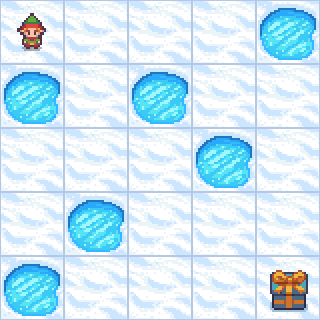

In [68]:
video_path="/content/replay.gif"
video_fps=1
record_video(env, q_table, video_path, video_fps)

from IPython.display import Image
Image('./replay.gif')